用數學說故事
===
微分方程
---

揳子

揳子
---

<Big>

假設我們在操作機器，或者上機，如果機器故障或者往網路不通，那麼 多久你會重新嘗試?

a)$^\circ$ 馬上， b)$^\circ$  喝杯飲料再試，c)$^\circ$  明天?


[Ref](https://docs.aws.amazon.com/prescriptive-guidance/latest/cloud-design-patterns/retry-backoff.html)

<details>
<summary>
<Big>
<font size="5em">
 <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>
    AWS, 雲端服務平台
  <br>  

 <p>

 <p>
  <img src="https://drive.google.com/uc?export=view&id=1wrY7ue_nQtOGFKdFZLgPzYJ3bXPi0S6j" width=800 />
</a>
</Big>

---
</summary>

<details>
<summary>

<Big>

服務中斷. <Big> ⇐ </Big> 服務限制、連線暫時遺失、服務暫停…

---

</summary>

<details>
<summary>

頻繁重試 <Big> ⇐ </Big> 網路頻寬過載、 爭用服務要求

</summary>

<details>
<summary>
<B>(AWS) Solution</b>

1. <Big>429</Big>, 嘗試太多
2. 三次重試，第一次在1.5秒，第二次在3秒，第三次在4.5秒

 <p>
  <img src="https://drive.google.com/uc?export=view&id=1QsgqWjZpJ3LwfOCGDvwtmoL1Q-I87IeH" width=800 />


xxx
</details></details></details>

<details>
<summary>
<Big>
<font size="5em">
 <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>
     希臘 馬奇士海峽
 </a>    
  <br>
  <p>
  <img src="https://drive.google.com/uc?export=view&id=1lFVG3ddS04MYSIrr-FJ_terHGhrDKdJ0" width=600 />  

 <p>

---
</summary>
<details>
<summary>
<Big>
<font size="5em">

  <br>
  <p>
  <img src="https://drive.google.com/uc?export=view&id=1f7kVGRMJAbRJRAkfp4NWjJR8CmylcWbe" width=600 />  

 <p>

---
</summary>

<details>
<summary>
<Big>
<font size="5em">

  <br>
  <p>
  <img src="https://drive.google.com/uc?export=view&id=1ECiYSaoHHg3o1yO5_UdXwH2UZ3Tx6ZaI" width=600 />  

 <p>

---
</summary>
<details>
<summary>
<Big>
潮汐. <Big>⬅︎</Big> 月亮</p>
 <big>⇞</Big><p>
 <Big>
 太陽

---
</summary>

<details>
<summary>
<font size="5em">

  <br>
  <p>
  <img src="https://drive.google.com/uc?export=view&id=1zEFGijJj21ZVXAwUBpfGqn8BT1gXOngU" width=1000 />  

 <p>

---
</summary>

<details>
<summary>

  <br>
  <p>
  <Big>
\begin{eqnarray}
  \text{潮汐力}&\propto&\text { 質量 } \\
  \text{潮汐力}&\propto&\text { (距離)}^{-3} \\
  \frac{\text{潮汐力}_{\text{月球}}}{\text{潮汐力}_{\text{太陽}}}&\approx& 2.2
\end{eqnarray}
 <p>

 </summary>

<details>
<summary>

Note
---


太陽	($1.9891 \times 10^{30}$ kg)<br>
----                            <Br>
月球	($7.349  \times 10^{22}$ kg)<br>

---                           <Br>
月球距地球 平均: $3.84 \times 10^5$ m;<br>

地球距太陽 平均: $1.4960\times 10^8$ m </br>


XXX

西元1971, 阿波羅15號
---

<Big>
太空人，D. Scott，設計了伽利略的實驗， 錘子 (32 公斤) 或者羽毛 (3 公克) 先落到地上?

<p>

  <img src="https://drive.google.com/uc?export=view&id=13KK-gTnnae_vY1-ySdBg0p6jNDuu8Cls" width=400 />  


<details>
<summary>
<Big>
<font size="5em">
 <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>
     為何叫 "微分方程"
  <br>  

 <p>



---
</summary>
<details>
<summary>
<Big>
<p>
因為

<pre>
微分 = '
方程 : A=B
</pre>
</a>
</Big>


XXX

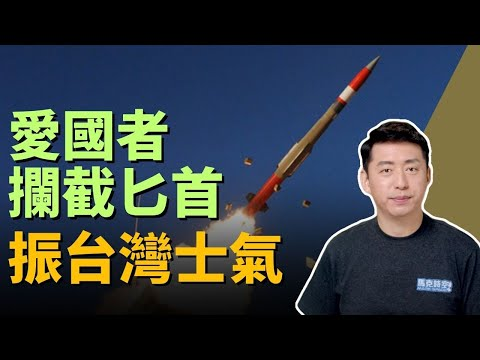

In [ ]:
# 3min
from IPython.display import YouTubeVideo
YouTubeVideo("yjyZgxRMyc8" ,width=800,higth=600)


<details>
<summary>
<Big>
<font size="5em">
 <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>
     例子 警犬追蹤
 </a>    
  <br>
  <p>
  <Big>
  嫌疑犯快速逃離現場，警犬在後面<b>朝著</b>嫌犯的方向快速追尋

 <p>

---
</summary>
<details>
<summary>

<Big>
牛頓的微積分
<pre>
   速度 = (位移)'
</pre>
</a>
</Big>

</summary>
<details>
<summary>

<Big>
\begin{eqnarray}
 \text{警犬}_{\text{速度}}&\propto& |\text{警犬}_{\text{速度}}|&\color{red}{\times}& \left(\text{警犬}_{\text{位置}}-\text{賊}_{\text{位置}}\right)\\
      && \text{ 數量} && \text{   方向}
\end{eqnarray}

</summary>
<details>
<summary>

<Big>
離散化
\begin{eqnarray}
 &&\text{警犬}_{\text{位置}}(n+1) \cr
 &=&\text{警犬}_{\text{位置}}(n)+\left(\text{警犬}_{\text{速度}}(n)-\text{賊}_{\text{速度}}(n)\right)\times \text{單位時間}
\end{eqnarray}
</summary>
<details>
<summary>

<Big>
模擬圖形

<img src="https://drive.google.com/uc?export=view&id=1rlzWra60c6S_iIxVM9SBPFOmsWl9UiIU" width=800 />  



<details>
<summary>
<Big>
<font size="5em">
 <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>
     備注
 </a>    
  <br>
  <p>
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Domenico-Fetti_Archimedes_1620.jpg/900px-Domenico-Fetti_Archimedes_1620.jpg" width=400 />  

 <p>

---

</summary>

<details>
<summary>

</Big>
從連續到離散，謎?

<p>
  <img src="https://upload.wikimedia.org/wikipedia/commons/6/66/NAMA_Machine_d%27Anticythère_1.jpg" width=400 />


</summary>

<details>
<summary>  

<Big>
Python Demonstration

</summary>

<details>
<summary>

<Big>
使用中文

<small>
<pre>
!pip install git+https://github.com/cchuang2009/tw_matplotlib.git
</pre>

</summary>

<details>
<summary>  

<pre>
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from moviepy.editor import *
import tw_matplotlib

import numpy as np
import matplotlib.pyplot as plt
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

# Set dog velocity
Vel = 6.0  # adjust this value to change the dog's velocity

# Set master velocity
Mvel = 5.0  # changed the sign to make Mpos move towards the west

# Set duration
duration = 5

# Set time step
dt = 0.1

# Initialize positions and velocities
Dpos = np.array([[0, 0]])
Mpos = np.array([[0, 10]])

# Create figure and axis
fig, ax = plt.subplots()

def make_frame(t):
    global Dpos, Mpos  # declare Dpos and Mpos as global variables
    
    # Calculate dog velocity
    Dvel = Vel * (Mpos[-1] - Dpos[-1]) / np.linalg.norm(Mpos[-1] - Dpos[-1])

    # Update master and dog positions
    Mpos1 = Mpos[-1] + [Mvel * dt,0]
    Dpos2 = Dpos[-1] + Dvel * dt
    #print(Mvel * dt)
    # Update master and dog positions arrays
    Mpos = np.vstack([Mpos, Mpos1])

    # Update master and dog positions arrays
    Mpos = np.vstack([Mpos, Mpos1])
    Dpos = np.vstack([Dpos, Dpos2])

    # Clear previous plot
    ax.clear()

    # Set plot limits
    ax.set_xlim([0, 18])
    ax.set_ylim([0, 14])

    # Plot master and dog positions
    ax.scatter(Mpos[:, 0], Mpos[:, 1], c='r')
    ax.scatter(Dpos[:, 0], Dpos[:, 1], c='g')

    # Add text to plot
    ax.text(1, 11.5,
            " 賊速度={0}\n 狗速度={1:.2f}".format(Mvel, Vel),
            fontsize=14, color='gray')

    # Return plot as an image
    return mplfig_to_npimage(fig)

# Create animation
animation = VideoClip(make_frame, duration=duration)

# Write animation to a GIF file
animation.write_gif('dog_chasing.gif', fps=20)

</pre>
</summary>
<details><details><details><details><details>

In [ ]:
!pip install git+https://github.com/cchuang2009/tw_matplotlib.git

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

  if event.key is 'enter':



  canvas.draw() # update/draw the elements

  canvas.draw() # update/draw the elements

  canvas.draw() # update/draw the elements

  canvas.draw() # update/draw the elements



MoviePy - Building file dog_chasing.gif with imageio.


  fig.canvas.print_figure(bytes_io, **kw)

  fig.canvas.print_figure(bytes_io, **kw)

  fig.canvas.print_figure(bytes_io, **kw)

  fig.canvas.print_figure(bytes_io, **kw)



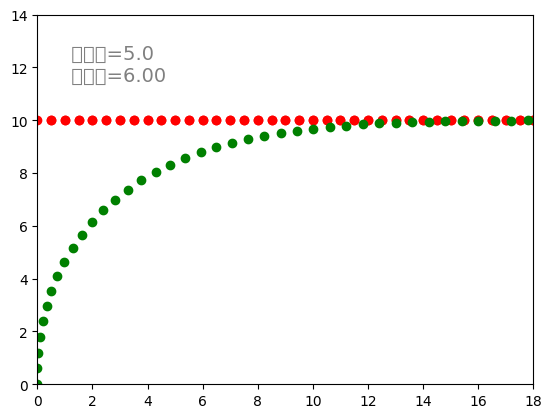

In [ ]:
# Set dog velocity
Vel = 6.0  # adjust this value to change the dog's velocity

# Set master velocity
Mvel = 5.0  # changed the sign to make Mpos move towards the west

# Set duration
duration = 5

# Set time step
dt = 0.1

# Initialize positions and velocities
Dpos = np.array([[0, 0]])
Mpos = np.array([[0, 10]])

# Create figure and axis
fig, ax = plt.subplots()

def make_frame(t):
    global Dpos, Mpos  # declare Dpos and Mpos as global variables

    # Calculate dog velocity
    Dvel = Vel * (Mpos[-1] - Dpos[-1]) / np.linalg.norm(Mpos[-1] - Dpos[-1])

    # Update master and dog positions
    Mpos1 = Mpos[-1] + [Mvel * dt,0]
    Dpos2 = Dpos[-1] + Dvel * dt
    #print(Mvel * dt)
    # Update master and dog positions arrays
    Mpos = np.vstack([Mpos, Mpos1])

    # Update master and dog positions arrays
    Mpos = np.vstack([Mpos, Mpos1])
    Dpos = np.vstack([Dpos, Dpos2])

    # Clear previous plot
    ax.clear()

    # Set plot limits
    ax.set_xlim([0, 18])
    ax.set_ylim([0, 14])

    # Plot master and dog positions
    ax.scatter(Mpos[:, 0], Mpos[:, 1], c='r')
    ax.scatter(Dpos[:, 0], Dpos[:, 1], c='g')

    # Add text to plot
    ax.text(1, 11.5,
            " 賊速度={0}\n 狗速度={1:.2f}".format(Mvel, Vel),
            fontsize=14, color='gray')

    # Return plot as an image
    return mplfig_to_npimage(fig)

# Create animation
animation = VideoClip(make_frame, duration=duration)

# Write animation to a GIF file
animation.write_gif('dog_chasing.gif', fps=20)

<details>
<summary>
<Big>
<font size="5em">
 <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>
     四貓戲圖
 </a>    
  <br>
  <p>
  <img src="https://drive.google.com/uc?export=view&id=1pzIqmhDzlXo9YDOcww5NqxDjW_QVsWqb" width=400 />  

 <p>

---
</summary>
<details>
<summary>
<Big>
四隻貓在四個角落，每隻貓開始追逐隔壁的貓咪尾巴，(順時鐘方向)

<Big>
$$ \text{ 貓}^i_{\text{速度}}\propto  \text{ 貓}^i_{\text{位置}}- \text{ 貓}^{i-1}_{\text{位置}}$$

---

</summary>
<details>
<summary>

<Big>
離散化
\begin{eqnarray}
 &&\text{貓}^{i}_{\text{位置}}(n+1) \cr
 &=&\text{貓}^i_{\text{位置}}(n)+\text{貓}^i_{\text{速度}}(n)\times \text{單位時間}
\end{eqnarray}
</summary>
<details>
<summary>

<Big>
模擬圖形

<pre>
from IPython.display import HTML
HTML(ani.to_html5_video())
</pre>


In [ ]:
from IPython.display import HTML
HTML(ani.to_html5_video())

NameError: name 'ani' is not defined

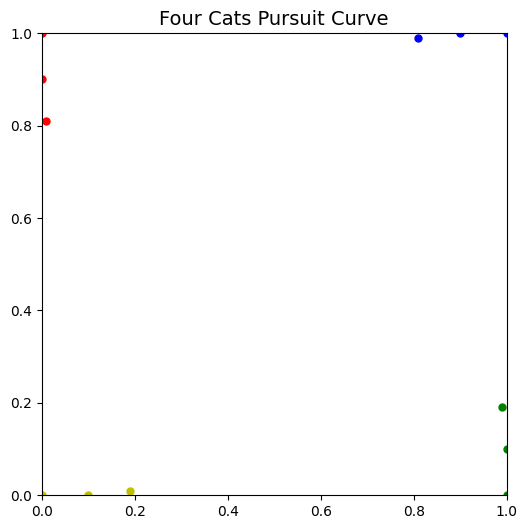

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Set initial positions of the four cats (corners of a unit square)
Cpos1 = np.array([[0, 0]])  # Yellow cat
Cpos2 = np.array([[1, 0]])  # Green cat
Cpos3 = np.array([[1, 1]])  # Blue cat
Cpos4 = np.array([[0, 1]])  # Red cat

dt = 0.1  # Time step

# Initialize the figure
fig, ax = plt.subplots(figsize=(6, 6))
plt.xlim(0, 1)
plt.ylim(0, 1)
ax.set_title("Four Cats Pursuit Curve", fontsize=14)

# Plot the initial positions
cat1, = ax.plot([], [], 'yo', markersize=5)  # Yellow cat
cat2, = ax.plot([], [], 'go', markersize=5)  # Green cat
cat3, = ax.plot([], [], 'bo', markersize=5)  # Blue cat
cat4, = ax.plot([], [], 'ro', markersize=5)  # Red cat

# Update function for animation
def update(frame):
    global Cpos1, Cpos2, Cpos3, Cpos4

    # Compute velocities (pursuit curve)
    v1 = (Cpos2[-1] - Cpos1[-1])
    v2 = (Cpos3[-1] - Cpos2[-1])
    v3 = (Cpos4[-1] - Cpos3[-1])
    v4 = (Cpos1[-1] - Cpos4[-1])

    # Update positions
    #Cpos1 = np.vstack([Cpos1, Cpos1[-1] + 3 * v1 * dt])  # Yellow cat (faster)
    Cpos1 = np.vstack([Cpos1, Cpos1[-1] + v1 * dt])
    Cpos2 = np.vstack([Cpos2, Cpos2[-1] + v2 * dt])
    Cpos3 = np.vstack([Cpos3, Cpos3[-1] + v3 * dt])
    Cpos4 = np.vstack([Cpos4, Cpos4[-1] + v4 * dt])

    # Update plot data to show entire history of movement
    cat1.set_data(Cpos1[:, 0], Cpos1[:, 1])
    cat2.set_data(Cpos2[:, 0], Cpos2[:, 1])
    cat3.set_data(Cpos3[:, 0], Cpos3[:, 1])
    cat4.set_data(Cpos4[:, 0], Cpos4[:, 1])

    # Check if all cats are close enough (converged)
    dist12 = np.linalg.norm(Cpos1[-1] - Cpos2[-1])
    dist23 = np.linalg.norm(Cpos2[-1] - Cpos3[-1])
    dist34 = np.linalg.norm(Cpos3[-1] - Cpos4[-1])
    dist41 = np.linalg.norm(Cpos4[-1] - Cpos1[-1])

    # Set a small threshold for convergence
    if dist12 < 0.01 and dist23 < 0.01 and dist34 < 0.01 and dist41 < 0.01:
        ani.event_source.stop()  # Stop animation when they converge

    return cat1, cat2, cat3, cat4

# Create the animation
ani = FuncAnimation(fig, update, frames=200, interval=10, blit=True)

# Show the animation
plt.show()


In [ ]:
from IPython.display import HTML
HTML(ani.to_html5_video())

<details>
<summary>
<Big>
<font size="5em">
 <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down">黃石公園, </em>
     野狼和鹿群
 </a>    
  <br>
  <p>
  <img src="https://drive.google.com/uc?export=view&id=1f4VDxNNnSAEBYSMmOO4IuJyGgbvsRNQg" width=600 />  

 <p>

----
</summary>
<details>
<summary>
<Big>
<font size="5em">
 <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"> 獵食者 - 獵物</em>

<p>
 <Big>
 1. 繁殖速度 $\approx$ 群組數目 <br>
 2. 繁殖速度 $\approx$ $-$ 外力影響 ( 掠食者數目，環境能源 ...)
     
 </a>    
  <br>

----
</summary>
<details>
<summary>

<Big>
掠奪者，獵物模型 (Lotka Volterra 模型)<br>
<video width="800" height="400" controls>
  <source src="https://drive.google.com/uc?export=view&id=1glcCOViFEGt7QkJXaMxHRVzk5xdqyvzN" type="video/mp4">
Your browser does not support the video tag.
</video>

----
</summary>
<details>
<summary>

\begin{eqnarray}
\frac{dx}{dt}&=&\alpha x -\beta x y\\
\frac{dy}{dt}&=&-\gamma y + \delta x y\
\end{eqnarray}


----
</summary>
<details>
<summary>

<Big>
離散 化!

XXX
</summary>


</details></details></details></details>

群星會
--

<Big>
太陽系. 星星, 那個 移動的比較快？  測量單位就是答案!

<img src="https://drive.google.com/uc?export=view&id=1PXFEnix1oHDZKtClVEa6LxwRbcRAWKBM" width=600 />  


# 紙飛機，Phugoid

    http://en.wikipedia.org/wiki/Phugoid

<img src="https://drive.google.com/uc?export=view&id=11DWERmalusZCFwovvghONCNekHO4LoDd" width=600 />  

二度空間的描述， 飛行速度 $\vec{ v}$，攻角 $\vec{ \theta}$


     
\begin{eqnarray*}
    速度變化，\left(\frac{dv}{dt}\right) &\propto&  攻角，阻力(- \vec{v}^2)， 動力 \\
   飛行角度變化，\left(\frac{d \theta}{d t }\right) &\propto& \frac{阻力}{飛行速度}
\end{eqnarray*}    




## 模擬結果

<Big><big>
phogoid(飛行時間，其實高度，進攻角度，初速)


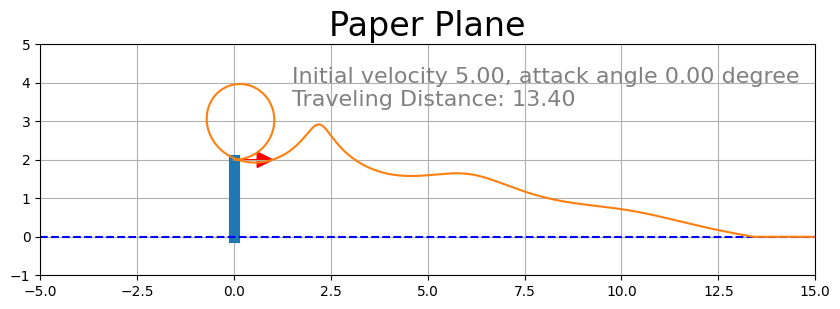

In [ ]:
#trajector(5,0)
phogoid(t,2,0,5)

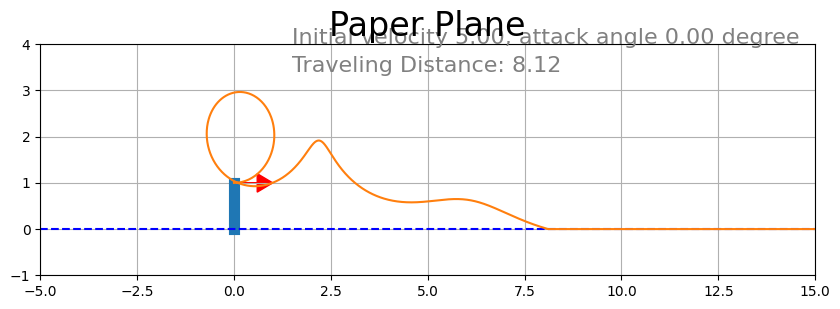

In [ ]:
phogoid(t,1,0,5)

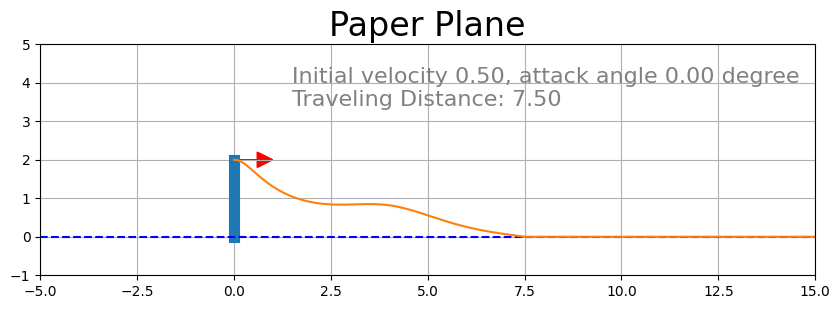

In [ ]:
#trajector(5,30)
phogoid(t,2,0,0.5)

In [ ]:
import numpy as np
from math import sin,cos,pi
from scipy.integrate import ode,odeint
import matplotlib.pylab as plt
from matplotlib import animation
#from JSAnimation import IPython_display
#from ipywidgets import StaticInteract, RangeWidget,RadioWidget
#from ipywidgets import r
#from IPython.html.widgets import *
from IPython.display import clear_output,HTML
import time,random,sys

%matplotlib inline

In [ ]:
F=0
R=0.2
h0=2

theta0=0
v0=5.

t = np.linspace(0, 20, 2000)

In [ ]:
def dx(x, t):
    """
    The right-hand side of the pendulum ODE
    (v,theta,x,y)
    """
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]

    dx1 = -sin(x2)-R*x1*x1+F
    dx2 = (x1*x1-cos(x2))/x1

    dx3 = x1*cos(x2)
    dx4 = x1*sin(x2)

    return [dx1, dx2, dx3, dx4]

In [ ]:
theta0Rad=theta0/180.*pi
x0 = [v0,theta0Rad,0,h0]

In [ ]:
x = odeint(dx, x0, t)

In [ ]:
distanceI=(x[:,3]>0)
y=x[:,3].clip(0)
TavelTime=sum(distanceI)

In [ ]:
def trajector(init,attack):
  s='Paper Plain'
  h0=2
  v0=init
  theta0=attack
  theta0Rad=theta0/180.*pi
  x0 = [v0,theta0Rad,0,h0]

  x = odeint(dx, x0, t)
  distanceI=(x[:,3]>0)
  y=x[:,3].clip(0)
  TavelTime=sum(distanceI)
  fig, axes = plt.subplots(figsize=(10,3))

  #plt.title(s,fontproperties=twfont,size=24)
  plt.text(3,4,'Initial velocity %2.2f, attack angle%2.1f' %(v0,theta0Rad), size=16)
  plt.text(3,3.4, 'Traveling Distance: %2.2f' %x[TavelTime,2], size=16)
  plt.ylim([-1,h0+3])
  plt.xlim([-5,15])
  plt.plot([0,0],[0,h0],lw=8)
  plt.plot([-5,15],[0,0],'--b')
  plt.arrow(0,h0,np.cos(theta0Rad)*0.6,np.sin(theta0Rad)*0.6,color='red',head_width=0.4, head_length=0.4 )
  plt.plot(x[:,2],y);

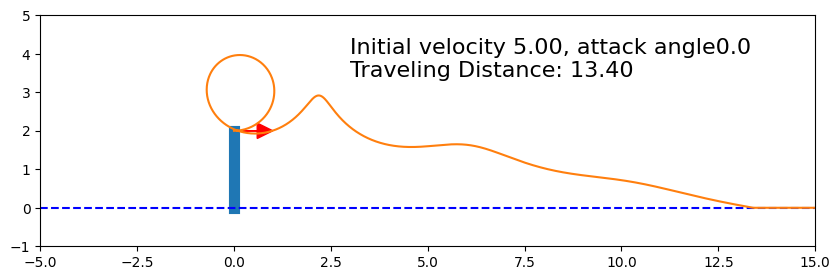

In [ ]:
#twfont = matplotlib.font_manager.FontProperties(fname='/usr/share/fonts/truetype/bkai00mp.ttf')
#s=u'\u7D19\u98DB\u6A5F'
s='Paper Plain'
fig, axes = plt.subplots(figsize=(10,3))



In [ ]:
def phogoid(t,h0,theta0,v0):
    theta0=theta0/180.*pi

    x0 = [v0,theta0,0,h0];
    x = odeint(dx, x0, t);
    distanceI=(x[:,3]>0)
    y=x[:,3].clip(0)
    TavelTime=sum(distanceI)

    fig, axes = plt.subplots(figsize=(10,3))
    plt.title('Paper Plane', size=24)
    plt.text(1.5,4,'Initial velocity %2.2f, attack angle %2.2f degree' %(v0,theta0), size=16, color='grey')
    plt.text(1.5,3.4, 'Traveling Distance: %2.2f' %x[TavelTime,2], size=16, color='grey')
    plt.ylim([-1,h0+3])
    plt.xlim([-5,15])
    plt.plot([0,0],[0,h0],lw=8)
    plt.plot([-5,15],[0,0],'--b')
    plt.arrow(0,h0,np.cos(theta0)*0.6,np.sin(theta0)*0.6,color='red',head_width=0.4, head_length=0.4)
    plt.grid()
    plt.plot(x[:,2],y)

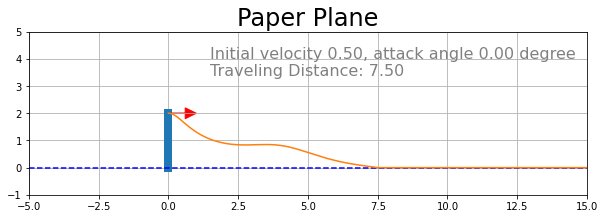

In [ ]:
phogoid(t,h0,0,0.5)

Here, generate the animation directly by **matplotlib.animation**, reference, `Documents/2016/Math/5 twoDimensionalWaves/2D waves by Circles.ipynb`, another method generated by moviepy

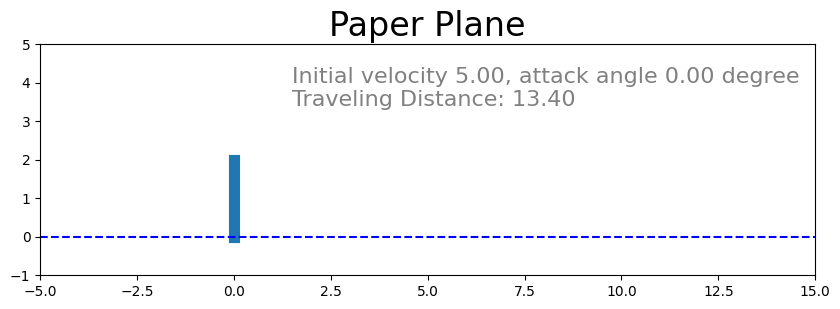

In [ ]:
ratio=20
anim = plt.figure(figsize=(10,3))
ax = anim.add_subplot(111)
ax.set_title("Paper Plane",fontsize=14)

plt.ylim([-1,h0+3])
plt.xlim([-5,15])
plt.plot([0,0],[0,h0],lw=8)
plt.plot([-5,15],[0,0],'--b')
plt.title('Paper Plane', size=24)
plt.text(1.5,4,'Initial velocity %2.2f, attack angle %2.2f degree' %(v0,theta0), size=16, color='grey')
plt.text(1.5,3.4, 'Traveling Distance: %2.2f' %x[TavelTime,2], size=16, color='grey')
#def init():
#    return  ax.plot(x[0,2],y[0],'--r'),\
#            plt.arrow(0,h0,np.cos(theta0)*0.6,np.sin(theta0)*0.6,color='red',head_width=0.4, head_length=0.4) \
#
#|
def animate(i):
    if (i>0):
        dx=(x[i*ratio,2]-x[(i-1)*ratio,2])#/np.abs(x[i*ratio,2]-x[(i-1)*ratio,2])*0.4
        dy=(y[i*ratio]-y[(i-1)*ratio])#/np.abs(y[i*ratio]-y[(i-1)*ratio])*0.4
    else:
        dx=np.cos(theta0)*0.6;
        dy=np.sin(theta0)*0.6;
    ax.plot(x[0:ratio*i:ratio,2],y[0:ratio*i:ratio],'--r')
    #ax.arrow(x[i*ratio,2],y[i*ratio],dx,dy,color='red',head_width=0.4, head_length=0.4,alpha=0.3)
    #return ax.plot(x[0:ratio*i:ratio,2],y[0:ratio*i:ratio],'--r'), \
    #    ax.arrow(x[i*ratio,2],y[i*ratio],dx,dy,color='red',head_width=0.4, head_length=0.4,alpha=0.3)


In [ ]:
anim1=animation.FuncAnimation(anim, animate, init_func=init,frames=int(TavelTime/ratio))

In [ ]:
HTML(anim1.to_html5_video())

Option for initial velocity and attack angle implement by `ipywidegets`, which usages are changed very differently among different versions.

In [ ]:
x0 = [v0,theta0,0,h0];
t = np.linspace(0, 20, 2000)
x = odeint(dx, x0, t);
distanceI=(x[:,3]>0)
y=x[:,3].clip(0)
TavelTime=sum(distanceI)
ratio=20

In [ ]:
def phogoid2(theta0,v0):
    angle=theta0/180.*pi

    x0 = [v0,angle,0,h0];
    x = odeint(dx, x0, t);
    distanceI=(x[:,3]>0)
    y=x[:,3].clip(0)
    TavelTime=sum(distanceI)

    figM = plt.figure(figsize=(10,3))
    ax=figM.add_subplot(111)
    plt.title('Paper Plane')
    plt.text(1.5,4,'Initial velocity %2.2f, attack angle %2.1f degree' %(v0,theta0), size=16, color='grey')
    plt.text(1.5,3.4, 'Traveling Distance: %2.2f' %x[TavelTime,2], size=16, color='grey')
    plt.ylim([-1,h0+3])
    plt.xlim([-5,15])
    ax.plot([0,0],[0,h0],lw=8)
    ax.plot([-5,15],[0,0],'--b')
    ax.arrow(0,h0,np.cos(angle),np.sin(angle),color='red',head_width=0.4, head_length=0.4)

    plt.grid()
    ax.plot(x[:,2],y)
    # to prevant the keep the previous ones left
    plt.show()
    #return figM

In [ ]:
import ipywidgets as widget

interactive_plot=widget.interactive(phogoid2,theta0=widget.IntSlider(min=0, max=90, step=5, description='AttackAngle',value=0),\
         v0=widget.FloatSlider(min=0.5, max=5, value=0.5,description='Initial Velocity',), continuous_update=False)
#interactive_plot.children[:-1]

In [ ]:
interactive_plot

interactive(children=(IntSlider(value=0, description='AttackAngle', max=90, step=5), FloatSlider(value=0.5, de…

實作競賽
==

<Big>
1. 紙飛機飛行距離競賽, <br>
2. 規則，比我飛行的距離遠 `得分`<br>
3. 作品，以 A4 紙張大小為基準




為什麼 許多鳥群以 V 形遷移？
---



<Big>

<img src="https://drive.google.com/uc?export=view&id=1-BbM_CF6Cv3we2z9NR104WRh9CyC0VPS" width=600 />  



將自己處於前方鳥所創造的渦流的上升部分,<b>鳥應將自己放在一側或另一側</b>

自由車 隊形，葡萄牙人 雪中行走...

Ref
---
[Nature 2014, Jan](https://www.nature.com/articles/505262a) V is for vortex.

美洲草原原住民 土撥鼠
===
<img src="https://drive.google.com/uc?export=view&id=1duYjd4321JkZnul9trvtd5U5OeB4TAzG" width=600 />  


白努力定律
---

<Big>
&nbsp; 速度快 <Big>⇋</Big> 壓力小


<details>
<summary>
<Big>
<font size="5em">
 <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down">高爾夫球, </em>
      網孔 Dimple's
 </a>    
  <br>
  <p>
<Big>  
  為什麼是貴族運動?

---

</summary>

<details>
<summary>
<Big>
<font size="5em">
  <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"> 複雜!  <br></em>
  Laminar Layer, 層流
 </a>

  <img src="https://drive.google.com/uc?export=view&id=12qND9yzUUmNy23F_30uB0-6-b-lG_iBb" width=600 />  

 <p>



----
</summary>

<details>
<summary>
<Big>
<font size="5em">
  <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"> 層流 或 湍流 <br></em>
 </a>

  <img src="https://drive.google.com/uc?export=view&id=16SXmD3KaC_p4nu8Q1kbWfRFcTfeoHr26" width=600 />  

 <p>



----
</summary>
<details>
<summary>
<Big>
<font size="5em">
  <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"> 雷諾數 <br></em>
 </a>


 <p>

<Big>
$$ 雷諾數 \propto \frac{慣性力}{粘性}$$

<Big>

雷諾數  大</Big>➠<Big> 流動 動量強 </Big>➠<Big>  湍流<Br>

<font color="brown">
<b>問題：</b> 颱風天，經過台北羅斯福路台電大樓，會碰到哪一種狀況？
</font>

----
</summary>
<details>
<summary>
<Big>
<font size="5em">
  <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"> 力學分析 <br></em>
 </a>

  <img src="https://drive.google.com/uc?export=view&id=1zVUhLoVz8OKY2ZZSIRAFFx-1BWq4N6F3" width=600 />  

---
</summary>
<details>
<summary>
<Big>
<font size="5em">
  <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"> 平滑球 <br></em>
 </a>

  <img src="https://drive.google.com/uc?export=view&id=13I-XN_wsS-eyKb2p5ZEsgSgPSPeHwIoU" width=600 />  

<Big>
球體附近,形成層狀邊界層,並且流動動量將消散(粘性), 流通量減少  

---

</summary>
<details>
<summary>
<Big>
<font size="5em">
  <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"> 高爾夫球 <br></em>
 </a>

  <img src="https://drive.google.com/uc?export=view&id=1G5o58C1euCEFjle1U8mVEkNkO1J7IPKy" width=600 />

<Big>
Dimples 孔 <Big> ➠ </Big> 湍流 增加 <Big> ➠ </Big> 流通量增加 <Big> ➠ </Big>  延遲的尾流分離 (低壓區域變小)

問題：為了增加速度，你會不會買一輛表面都是孔洞的汽車?

xxx
</summary>
</details></details></details></details></details>


言出必行
---
<Big>
1956 (電晶體), 1972 (超導體) 諾貝爾物理物理獎得主 約翰·巴丁（John Bardeen）

<img src="https://drive.google.com/uc?export=view&id=17Ooe6SmzN10yFWm6w0pJKV6KsSNR7lER" width=600 />

承諾 瑞典國王古斯塔夫六世，1972 巴丁帶全部的小孩 參加頒獎典禮。

隱形飛機
===
  <img src="https://drive.google.com/uc?export=view&id=1cWbla0BPYpj5kQZGKcYQ9MrQTuJNGUfr" width=800 />


第六代 戰機
---
<Big>
朝辭白帝彩雲間，千里江陵一日還，兩岸猿聲啼不住，輕舟已過萬重山<Br>
<img src="https://drive.google.com/uc?export=view&id=1XgHQ9H-RUZlmuv4qRd--r8mzoMoXR59K" width=800 />


US, X48
---
<img src="https://drive.google.com/uc?export=view&id=1YIZpcR8e0BACJSUMbC4OyHjlTunoBIKX" width=800 />


Russia, Su70
---
<img src="https://drive.google.com/uc?export=view&id=1ut6wwePfjZpFol3cIzDWU_xuUMXF-dqP" width=800 />



不可能的任務
---
駭入系統，取消 核彈任務,


No Wifi, No GPS, 只有 慣性導航

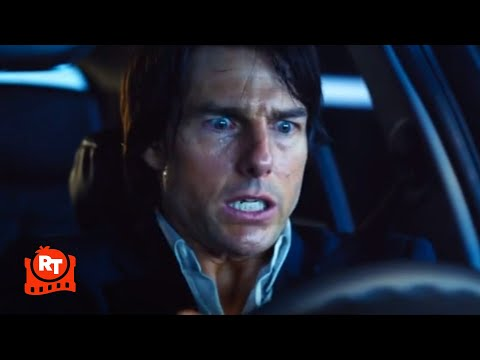

In [ ]:
from IPython.display import YouTubeVideo


YouTubeVideo('h_-BizuYQ4c')

車流，水流
===

壓縮水管的管徑，水噴得更遠<br>

高速公路車流越密度越高，<font color="brown"> 越會塞車</font> <Br>

===


<Big><Big>
車流 $\neq$ 水流

<p>
XXX<p>
<Big>
<b>Reference</b>

1. 西城活裕 （にしなり かつひろ), 『渋滞学』新潮選書, 2006
2. B. Derrida, S.A. Janowsky, J.L. Lebowitz, E.R. Speer, Exact solution of the totally asymmetric simple exclusion process: shock profiles J. Stat. Phys. 73, 813-842 (1993)
3. B. Derrida, M.R. Evans, V. Hakim, V. Pasquier, Exact solution of a 1d asymmetric exclusion model using a matrix formulation J. Phys. A26, 1493-1517 (1993)

相互排斥的粒子不對稱(隨機) 模型
===
1. 法國 Derrida , 解決 ASEP Model
2. 日本西城 擁擠學

De Bloglie 物質波
===

In [ ]:
#
aesp2(80,10,100)

--D--------------------D-----------D-----D--------D-D---D---D-----------D------D


In [ ]:
aesp2(80,50,100)

D-DDDD-DDD-D-D-D-D-D-D-DD-D-D-D-D-DDDDDDDDDD-D-DD-DDD-DDD-D-D-D-D-D-D-D-D-D-D-D-


In [ ]:
aesp(80,50,50)

-DDDDDDDDDDDDDD--DD-D-D--D-DD---DDD-DD-D--D-DD-DD-D-----DDDDD-DD---DDD-DDDDDDD--
-DDDDDDDDDDDDD-D-D-D-D-D--DD-D--DD-DD-D-D--DD-DD-D-D----DDDD-DD-D--DD-DDDDDDD-D-
-DDDDDDDDDDDD-D-D-D-D-D-D-D-D-D-D-DD-D-D-D-D-DD-D-D-D---DDD-DD-D-D-D-DDDDDDD-D-D
DDDDDDDDDDDD-D-D-D-D-D-D-D-D-D-D-DD-D-D-D-D-DD-D-D-D-D--DD-DD-D-D-D-DDDDDDD-D-D-
DDDDDDDDDDD-D-D-D-D-D-D-D-D-D-D-DD-D-D-D-D-DD-D-D-D-D-D-D-DD-D-D-D-DDDDDDD-D-D-D
DDDDDDDDDD-D-D-D-D-D-D-D-D-D-D-DD-D-D-D-D-DD-D-D-D-D-D-D-DD-D-D-D-DDDDDDD-D-D-DD
DDDDDDDDD-D-D-D-D-D-D-D-D-D-D-DD-D-D-D-D-DD-D-D-D-D-D-D-DD-D-D-D-DDDDDDD-D-D-DDD
DDDDDDDD-D-D-D-D-D-D-D-D-D-D-DD-D-D-D-D-DD-D-D-D-D-D-D-DD-D-D-D-DDDDDDD-D-D-DDDD
DDDDDDD-D-D-D-D-D-D-D-D-D-D-DD-D-D-D-D-DD-D-D-D-D-D-D-DD-D-D-D-DDDDDDD-D-D-DDDDD
DDDDDD-D-D-D-D-D-D-D-D-D-D-DD-D-D-D-D-DD-D-D-D-D-D-D-DD-D-D-D-DDDDDDD-D-D-DDDDDD
DDDDD-D-D-D-D-D-D-D-D-D-D-DD-D-D-D-D-DD-D-D-D-D-D-D-DD-D-D-D-DDDDDDD-D-D-DDDDDDD
DDDD-D-D-D-D-D-D-D-D-D-D-DD-D-D-D-D-DD-D-D-D-D-D-D-DD-D-D-D-DDDDDDD-D-D-DDDDDDDD
DDD-D-D-D-D-D-D-D-D-D-D-DD-D

In [ ]:
import random
from IPython.display import clear_output,HTML
import time,sys
ACTIVE = True
PASSIVE = False

class Node:
    def __init__(self, state):
        self._state = state

    def flip(self):
        self._state = not self._state
        return self._state

    def state(self):
        return self._state

    def __str__(self):
        return self._state and "D" or "-"



class AsepField(list):
    def __init__(self, length):
        list.__init__(self, [Node(PASSIVE) for _ in range(length)])

    def update(self):
        def pred(idx):
            return self[idx].state() and \
                   not self[(idx+1)%len(self)].state()
        predlst = [pred(x) for x in range(len(self))]
        for i in range(len(self)):
            if predlst[i]:
               self[i].flip()
               self[(i+1)%len(self)].flip()

    def __str__(self):
        strs = list(map(str, self))
        s = "<AsepField at %d [%s]>" % (id(self), ", ".join(strs))
        return s

def aesp(*args):
    arg = [int(x) for x in args]
    asep = AsepField(arg[0])

    # init
    for i in range(arg[1]):
        lst = [x for x in range(len(asep)) if not asep[x].state()]
        idx = random.choice(lst)
        asep[idx].flip()

    # mainloop
    for i in range(arg[2]):
        #print "".join(map(str, asep))+ "\r",
        print("".join(map(str,asep)))
        #time.sleep(0.5)
        asep.update()

In [ ]:

def aesp2(*args):
    arg = [int(x) for x in args]
    asep = AsepField(arg[0])

    # init
    for i in range(arg[1]):
        lst = [x for x in range(len(asep)) if not asep[x].state()]
        idx = random.choice(lst)
        asep[idx].flip()


    for i in range(arg[2]):
        #print "".join(map(str, asep))+ "\r",$
        #time.sleep(0.2)
        clear_output(wait=True)
        print("".join(map(str,asep)))

        time.sleep(0.3)
        asep.update()
        sys.stdout.flush()

In [ ]:
aesp2(80,45,100)

-D-D-D-DD-DDDD-DD-D-D-D-D-D-D-D-D-D-DDDDDD-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D


In [ ]:
def aesp3(*args):
    arg = [int(x) for x in args]
    asep = AsepField(arg[0])

    # init
    for i in range(arg[1]):
        lst = [x for x in range(len(asep)) if not asep[x].state()]
        idx = random.choice(lst)
        asep[idx].flip()

    red_d_index = None
    frame_to_display = None

    for frame in range(arg[2]):
        clear_output(wait=True)

        # Create a list of characters
        display = list(map(str, asep))

        # Find the first 'D' and color it red if not already set
        if red_d_index is None and 'D' in display:
            red_d_index = display.index('D')

        # Move the red 'D' if possible
        if red_d_index is not None:
            # Check if the current red_d_index is still a 'D'
            if display[red_d_index] != 'D':
                # If not, find the next 'D'
                try:
                    red_d_index = display.index('D', red_d_index)
                except ValueError:
                    # If no 'D' found from current position, search from the beginning
                    try:
                        red_d_index = display.index('D')
                    except ValueError:
                        # If no 'D' at all, reset red_d_index
                        red_d_index = None

            if red_d_index is not None:
                # Check if there's a blank space before the red D
                if red_d_index > 0 and display[red_d_index - 1] == '.':
                    frame_to_display = frame

                # Move forward if there's space
                if red_d_index < len(display) - 1 and display[red_d_index + 1] == '.':
                    red_d_index += 1
                    if frame_to_display == frame - 1:
                        print(f"Red D moved at frame {frame}")
                        frame_to_display = None

                # Color the current D red
                display[red_d_index] = '\033[91mD\033[0m'  # Red color

        print(f"Frame {frame}: " + "".join(display))

        if frame_to_display == frame:
            print(f"Red D has a blank space before it at frame {frame}")

        time.sleep(0.3)
        asep.update()
        sys.stdout.flush()

In [ ]:
aesp3(80,30,100)

Frame 99: -D-D-D-D-D-D--D-D-D-D-D-D------D--D-----D-D-D-D-D--D-D-D-D-D---------D-D-D-D-D-D


In [ ]:
aesp(80,40,50)

DDD---DD--DDD-----D-D-D---DDDD--DD------D-DDD-DDDD-D---DD--D-DD----DDDDDD---DD-D
DD-D--D-D-DD-D-----D-D-D--DDD-D-D-D------DDD-DDDD-D-D--D-D--DD-D---DDDDD-D--D-DD
D-D-D--D-DD-D-D-----D-D-D-DD-D-D-D-D-----DD-DDDD-D-D-D--D-D-D-D-D--DDDD-D-D--DDD
-D-D-D--DD-D-D-D-----D-D-DD-D-D-D-D-D----D-DDDD-D-D-D-D--D-D-D-D-D-DDD-D-D-D-DDD
D-D-D-D-D-D-D-D-D-----D-DD-D-D-D-D-D-D----DDDD-D-D-D-D-D--D-D-D-D-DDD-D-D-D-DDD-
-D-D-D-D-D-D-D-D-D-----DD-D-D-D-D-D-D-D---DDD-D-D-D-D-D-D--D-D-D-DDD-D-D-D-DDD-D
D-D-D-D-D-D-D-D-D-D----D-D-D-D-D-D-D-D-D--DD-D-D-D-D-D-D-D--D-D-DDD-D-D-D-DDD-D-
-D-D-D-D-D-D-D-D-D-D----D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D--D-DDD-D-D-D-DDD-D-D
D-D-D-D-D-D-D-D-D-D-D----D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D--DDD-D-D-D-DDD-D-D-
-D-D-D-D-D-D-D-D-D-D-D----D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-DD-D-D-D-DDD-D-D-D
D-D-D-D-D-D-D-D-D-D-D-D----D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-DD-D-D-D-DDD-D-D-D-
-D-D-D-D-D-D-D-D-D-D-D-D----D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-D-DD-D-D-D-DDD-D-D-D-D
D-D-D-D-D-D-D-D-D-D-D-D-D---

<details>
<summary>
<Big>
<font size="5em">
 <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"> 林口交流道 </em>
 </a>    
  <br>


1. 使用 [Claude](https://claude.ai/login?) 輔助
2. 應用 西城活裕 『渋滞学』 和 Derride's AESP 模型

---

</summary>

<details>
<summary>

<Big>
為何常塞車? (Derride 的 AESP)

1. 加速區（Acceleration）問題：
  - 林口交流道的加速車道較短
  - 上坡路段影響車輛加速能力
  - 符合西城活裕提出的加速不足理論

2. 入口區（Entry）特性：
 - 主線與匝道車流交織
 - 車流密度在此處驟增
 - 符合渋滞学中的流量突變理論

3. 緩行區（Slowdown）形成：
 - 車速差異造成波動效應
 - 大型車比例高導致減速連鎖反應
 - 坡度變化加劇減速現象

4. 壓力區（Pressure）擴散：
 - 壅塞從匯流點向上游蔓延
 - 符合 Derride 提出的壓力傳導模型
 - 在尖峰時段特別明顯

===

結論
---

<img src="https://drive.google.com/uc?export=view&id=1D1OES-pQlNbiOKBRyUr3ITDBbvI6bd9N" width=1200 />

- 塞車的起始點通常在匯流處
- 壅塞往上游擴散的現象
- 車流密度與車速的關係

---

</summary>
<details>
<summary>

<Big>
改善：

1. 延長加速車道<br>
2. 優化匯流點設計<br>
3. 實施智慧動態車道管理<br>
4. 建立預警機制減少突發壓力

===
</summary>
<details>
<summary>


Phogoid
===

<Big>
1. phugoid 運動可以發生在各種飛機上。 <br>
2. 控制面板偏移的影響。
3. 空速和攻角的影響。 <br>
4. phugoid運動可以發生在不同的飛行模式中，例如升降或巡航。 <br>
5. phugoid運動經常與其他振動類型（例如滾動和pitch振動）進行比較。<br>
6. 實際案例：1994年的一架波音747-200F貨運機的墜機事故。 <br>
7. 模擬和模型。 <br>

第五代隱形飛機
===
<Big>
1. 隱形技術：F-35和F-22使用先進的材料和設計技巧，減少了雷達反射面 (RCS)，讓它們難以被偵測。 <br>
2. 超級巡航：F-35 允許飛機保持穩定的航向和速度。 <br>
3. 先進的航空電子系統：這些系統包括先進的雷達、感應器和通訊系統。 <br>
4. 超臨界空翼：F-22 使用超臨界空翼，生產更高的升力比和降力比，而不是傳統空翼。<br>
5. 前緣根部升力器：F-22和F-35具有前緣根部升力器（LERX），這些小型三角形設備幫助提高升力和減少阻力。<br>
6. 雷達吸收材料：F-35和F-22使用雷達吸收材料（RAM）以減少雷達反射面。<br>
7. 先進的推進系統：F-35具有獨特的推進系統，結合了傳統渦輪扇引擎和次要動力單元 。<br>
8. 自動系統。


超臨界空翼
---
<img src="https://drive.google.com/uc?export=view&id=1yP_Y4KifkfQ5vXIGTiPzEaguCEBGMbvl" width=800 />


備注
---
<Big>
 J35(20) 偷竊 F35(22) 機密?
<ol>
<li> 蘇俄科學家 [Pyotr Ufimtsev](https://www.wearethemighty.com/popular/soviet-stealth-scientist-ufimtsev-history/)
<li> 洛克希德 悉尼·沃斯（Sydney Voss） 使用上述設計新型飛機, FACETED RADAR BASED DESIGN 或 FDRB, <Big>➠ </Big> F117
<li> 1990 -, 被解密, 1995年左右,中國人走進檔案館, 取得所有與 1972/73 年 資料
<li> 中共取得 在南斯拉夫 墜毁 F117 ，獲得的塗層材料(？) <Big>➠ </Big> J-20
<li> 雙子星大廈的鋼材?
</ol>,


神奇萬物
---
<Big>
站在一輛 快速行駛 的車上面，沒有遮蔽物，...

<img src="https://drive.google.com/uc?export=view&id=1nV9-JKkInM23pIV5FCP44NC6wNIBSSnD" width=800 />


眼睛耳朵頭，三位一體

<details>
<summary>
<Big>
<font size="5em">
 <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down">眼睛 <Big>↔︎</Big> 耳朵 <Big>↔︎</Big> 頭 </em>
     ，三位一體
 </a>    
  <br>
墨西哥金字塔， 與 羽蛇神 相遇

[J. Acoustical Society of America, V.116, 6, Dec, 2004](https://pubs.aip.org/asa/jasa/article-abstract/116/6/3328/545164/A-theoretical-study-of-special-acoustic-effects?redirectedFrom=fulltext)


---

</summary>

<details>
<summary>

<img src="https://drive.google.com/uc?export=view&id=1XQ-Nwb_PELRLIYVqzUYjipSsIX5HXW85" width=800 />


---

</summary>

<details>
<summary>

<img src="https://drive.google.com/uc?export=view&id=18PzMyK7cNKvMMW4KEQiRbiy7QTP4E0Vv" width=800 />


---

</summary>

<details>
<summary>

<img src="https://drive.google.com/uc?export=view&id=1_6E8D0DommOM6r7j7EoNGp3xx8qi4VHx" width=800 />


XXX

</summary>

</details></details></details></details>

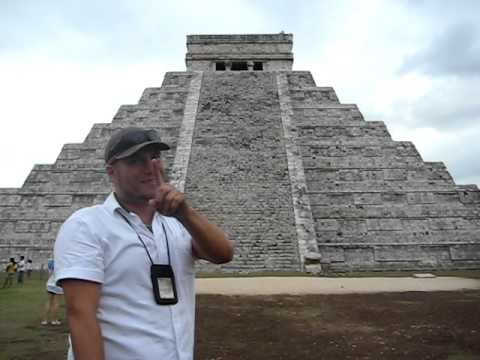

In [ ]:
# 3min
from IPython.display import YouTubeVideo
YouTubeVideo("cvC_deZuDDg" ,width=800,higth=600)

# Magic

What you don't have any idea is called *MAGIC*; otherwise, it is called *TRIVIAL*.

Suppose that 100 digits, each with integer value between 0 and 9, are created by random. Take any  oans ne from the first digits and follows the following rule to do:

       Move the position to the next one according to the value of chosen digit, e.g. "3" means moves 3 steps, and "0" moves 10
       steps. Continue the process till can not move again. And I can guess the final figid what you get.

In [ ]:
x=floor(10*np.random.random(100))
print(x)

[ 8.  8.  3.  1.  0.  3.  5.  4.  3.  7.  3.  7.  2.  4.  2.  7.  7.  0.
  1.  5.  9.  1.  7.  1.  6.  0.  3.  2.  1.  6.  9.  5.  3.  2.  0.  5.
  0.  6.  5.  6.  6.  2.  7.  5.  8.  3.  2.  6.  5.  8.  2.  8.  8.  0.
  9.  7.  3.  3.  9.  9.  9.  0.  6.  7.  6.  1.  7.  1.  0.  0.  0.  6.
  5.  9.  5.  5.  3.  7.  7.  7.  3.  4.  8.  8.  5.  1.  5.  9.  4.  2.
  1.  8.  8.  7.  9.  2.  8.  8.  4.  5.]


In [ ]:
def magic(first,x):
    i=first
    while i<size(x):
        print(i,int(x[i]))
        if x[i]==0.:
           i+=10;
        else: i+=int(x[i]);

In [ ]:
magic(9,x)

(9, 7)
(16, 7)
(23, 1)
(24, 6)
(30, 9)
(39, 6)
(45, 3)
(48, 5)
(53, 0)
(63, 7)
(70, 0)
(80, 3)
(83, 8)
(91, 8)
(99, 5)


In [ ]:
magic(4,x)

(4, 0)
(14, 2)
(16, 7)
(23, 1)
(24, 6)
(30, 9)
(39, 6)
(45, 3)
(48, 5)
(53, 0)
(63, 7)
(70, 0)
(80, 3)
(83, 8)
(91, 8)
(99, 5)
